In [1]:
import os
os.chdir(os.path.abspath('..'))

import torch
from scripts import model_loader
from model import pipeline

from PIL import Image
from transformers import CLIPTokenizer

DEVICE = "cpu"

ALLOW_CUDA = True
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.has_mps or torch.backend.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"
print(f"Using device: {DEVICE}")

tokenizer = CLIPTokenizer("data/vocab.json", merges_file="data/merges.txt")
model_file = "saved_checkpoints/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

for model_name, model in models.items():
    print(f"{model_name} model loaded: {type(model)}")

h:\Documents\GitHub\stable-diffusion-from-scratch\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda


h:\Documents\GitHub\stable-diffusion-from-scratch\venv\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


encoder model loaded: <class 'model.encoder.VAE_Encoder'>
decoder model loaded: <class 'model.decoder.VAE_Decoder'>
diffusion model loaded: <class 'model.diffusion.Diffusion'>
clip model loaded: <class 'model.clip.CLIP'>


# Text-to-Image Architecture

Conditional CLIP embedding stats: mean=-0.1073, std=1.0221
Unconditional CLIP embedding stats: mean=-0.1088, std=1.0394
CLIP encoding shape: torch.Size([2, 77, 768])
CLIP encoding stats: mean=-0.1080, std=1.0308
Initial latents shape: torch.Size([1, 4, 64, 64])
Initial latents mean: 0.0002, std: 1.0058


  2%|▏         | 1/50 [00:04<03:16,  4.01s/it]

CFG output stats: mean=-0.0015, std=1.0038
Step 0, timestep: 980
UNet input stats: mean=0.0002, std=1.0058
UNet output stats: mean=-0.0015, std=1.0038
Updated latents stats: mean=-0.0013, std=1.0059


  4%|▍         | 2/50 [00:07<03:07,  3.90s/it]

CFG output stats: mean=-0.0032, std=1.0041
Step 1, timestep: 960
UNet input stats: mean=-0.0013, std=1.0058
UNet output stats: mean=-0.0032, std=1.0041
Updated latents stats: mean=0.0024, std=0.9996


  6%|▌         | 3/50 [00:11<03:06,  3.98s/it]

CFG output stats: mean=-0.0092, std=1.0003
Step 2, timestep: 940
UNet input stats: mean=0.0024, std=0.9996
UNet output stats: mean=-0.0092, std=1.0003
Updated latents stats: mean=-0.0005, std=0.9953


  8%|▊         | 4/50 [00:16<03:07,  4.08s/it]

CFG output stats: mean=-0.0103, std=0.9959
Step 3, timestep: 920
UNet input stats: mean=-0.0005, std=0.9952
UNet output stats: mean=-0.0103, std=0.9959
Updated latents stats: mean=0.0003, std=0.9980


 10%|█         | 5/50 [00:20<03:05,  4.11s/it]

CFG output stats: mean=-0.0085, std=0.9986
Step 4, timestep: 900
UNet input stats: mean=0.0003, std=0.9980
UNet output stats: mean=-0.0085, std=0.9986
Updated latents stats: mean=-0.0012, std=0.9994


 12%|█▏        | 6/50 [00:24<02:59,  4.07s/it]

CFG output stats: mean=-0.0120, std=1.0010
Step 5, timestep: 880
UNet input stats: mean=-0.0012, std=0.9994
UNet output stats: mean=-0.0120, std=1.0010
Updated latents stats: mean=0.0013, std=0.9958


 14%|█▍        | 7/50 [00:28<02:51,  3.98s/it]

CFG output stats: mean=-0.0055, std=0.9975
Step 6, timestep: 860
UNet input stats: mean=0.0013, std=0.9958
UNet output stats: mean=-0.0055, std=0.9975
Updated latents stats: mean=0.0094, std=0.9908


 16%|█▌        | 8/50 [00:31<02:42,  3.87s/it]

CFG output stats: mean=0.0016, std=0.9912
Step 7, timestep: 840
UNet input stats: mean=0.0094, std=0.9908
UNet output stats: mean=0.0016, std=0.9912
Updated latents stats: mean=0.0146, std=0.9909


 18%|█▊        | 9/50 [00:35<02:36,  3.82s/it]

CFG output stats: mean=0.0022, std=0.9891
Step 8, timestep: 820
UNet input stats: mean=0.0146, std=0.9909
UNet output stats: mean=0.0022, std=0.9891
Updated latents stats: mean=0.0194, std=0.9867


 20%|██        | 10/50 [00:39<02:33,  3.83s/it]

CFG output stats: mean=0.0016, std=0.9844
Step 9, timestep: 800
UNet input stats: mean=0.0194, std=0.9866
UNet output stats: mean=0.0016, std=0.9844
Updated latents stats: mean=0.0221, std=0.9907


 22%|██▏       | 11/50 [00:43<02:30,  3.87s/it]

CFG output stats: mean=-0.0005, std=0.9888
Step 10, timestep: 780
UNet input stats: mean=0.0221, std=0.9907
UNet output stats: mean=-0.0005, std=0.9888
Updated latents stats: mean=0.0227, std=0.9861


 24%|██▍       | 12/50 [00:47<02:28,  3.91s/it]

CFG output stats: mean=-0.0002, std=0.9896
Step 11, timestep: 760
UNet input stats: mean=0.0227, std=0.9861
UNet output stats: mean=-0.0002, std=0.9896
Updated latents stats: mean=0.0240, std=0.9894


 26%|██▌       | 13/50 [00:51<02:25,  3.92s/it]

CFG output stats: mean=-0.0018, std=0.9887
Step 12, timestep: 740
UNet input stats: mean=0.0240, std=0.9893
UNet output stats: mean=-0.0018, std=0.9887
Updated latents stats: mean=0.0328, std=0.9906


 28%|██▊       | 14/50 [00:54<02:18,  3.84s/it]

CFG output stats: mean=0.0017, std=0.9879
Step 13, timestep: 720
UNet input stats: mean=0.0328, std=0.9906
UNet output stats: mean=0.0017, std=0.9879
Updated latents stats: mean=0.0349, std=0.9901


 30%|███       | 15/50 [00:58<02:12,  3.78s/it]

CFG output stats: mean=0.0013, std=0.9872
Step 14, timestep: 700
UNet input stats: mean=0.0349, std=0.9900
UNet output stats: mean=0.0013, std=0.9872
Updated latents stats: mean=0.0395, std=0.9907


 32%|███▏      | 16/50 [01:02<02:07,  3.76s/it]

CFG output stats: mean=0.0013, std=0.9866
Step 15, timestep: 680
UNet input stats: mean=0.0395, std=0.9907
UNet output stats: mean=0.0013, std=0.9866
Updated latents stats: mean=0.0398, std=0.9922


 34%|███▍      | 17/50 [01:06<02:06,  3.83s/it]

CFG output stats: mean=0.0013, std=0.9884
Step 16, timestep: 660
UNet input stats: mean=0.0398, std=0.9922
UNet output stats: mean=0.0013, std=0.9884
Updated latents stats: mean=0.0398, std=0.9969


 36%|███▌      | 18/50 [01:11<02:12,  4.14s/it]

CFG output stats: mean=0.0010, std=0.9942
Step 17, timestep: 640
UNet input stats: mean=0.0398, std=0.9969
UNet output stats: mean=0.0010, std=0.9942
Updated latents stats: mean=0.0423, std=0.9919


 38%|███▊      | 19/50 [01:15<02:12,  4.27s/it]

CFG output stats: mean=-0.0011, std=0.9873
Step 18, timestep: 620
UNet input stats: mean=0.0423, std=0.9919
UNet output stats: mean=-0.0011, std=0.9873
Updated latents stats: mean=0.0429, std=0.9947


 40%|████      | 20/50 [01:20<02:11,  4.38s/it]

CFG output stats: mean=-0.0005, std=0.9852
Step 19, timestep: 600
UNet input stats: mean=0.0429, std=0.9947
UNet output stats: mean=-0.0005, std=0.9852
Updated latents stats: mean=0.0450, std=0.9920


 42%|████▏     | 21/50 [01:24<02:06,  4.38s/it]

CFG output stats: mean=0.0003, std=0.9832
Step 20, timestep: 580
UNet input stats: mean=0.0450, std=0.9920
UNet output stats: mean=0.0003, std=0.9832
Updated latents stats: mean=0.0471, std=0.9904


 44%|████▍     | 22/50 [01:28<02:02,  4.36s/it]

CFG output stats: mean=-0.0008, std=0.9786
Step 21, timestep: 560
UNet input stats: mean=0.0471, std=0.9903
UNet output stats: mean=-0.0008, std=0.9786
Updated latents stats: mean=0.0503, std=0.9869


 46%|████▌     | 23/50 [01:33<01:56,  4.31s/it]

CFG output stats: mean=-0.0011, std=0.9688
Step 22, timestep: 540
UNet input stats: mean=0.0503, std=0.9869
UNet output stats: mean=-0.0011, std=0.9688
Updated latents stats: mean=0.0500, std=0.9823


 48%|████▊     | 24/50 [01:37<01:50,  4.26s/it]

CFG output stats: mean=-0.0016, std=0.9673
Step 23, timestep: 520
UNet input stats: mean=0.0500, std=0.9823
UNet output stats: mean=-0.0016, std=0.9673
Updated latents stats: mean=0.0565, std=0.9841


 50%|█████     | 25/50 [01:41<01:44,  4.18s/it]

CFG output stats: mean=-0.0016, std=0.9681
Step 24, timestep: 500
UNet input stats: mean=0.0565, std=0.9841
UNet output stats: mean=-0.0016, std=0.9681
Updated latents stats: mean=0.0595, std=0.9817


 52%|█████▏    | 26/50 [01:45<01:39,  4.14s/it]

CFG output stats: mean=-0.0010, std=0.9581
Step 25, timestep: 480
UNet input stats: mean=0.0595, std=0.9817
UNet output stats: mean=-0.0010, std=0.9581
Updated latents stats: mean=0.0586, std=0.9788


 54%|█████▍    | 27/50 [01:50<01:38,  4.30s/it]

CFG output stats: mean=-0.0011, std=0.9512
Step 26, timestep: 460
UNet input stats: mean=0.0586, std=0.9788
UNet output stats: mean=-0.0011, std=0.9512
Updated latents stats: mean=0.0609, std=0.9767


 56%|█████▌    | 28/50 [01:54<01:36,  4.37s/it]

CFG output stats: mean=-0.0017, std=0.9460
Step 27, timestep: 440
UNet input stats: mean=0.0609, std=0.9767
UNet output stats: mean=-0.0017, std=0.9460
Updated latents stats: mean=0.0641, std=0.9754


 58%|█████▊    | 29/50 [01:58<01:30,  4.33s/it]

CFG output stats: mean=-0.0017, std=0.9390
Step 28, timestep: 420
UNet input stats: mean=0.0641, std=0.9754
UNet output stats: mean=-0.0017, std=0.9390
Updated latents stats: mean=0.0678, std=0.9764


 60%|██████    | 30/50 [02:02<01:25,  4.28s/it]

CFG output stats: mean=-0.0015, std=0.9370
Step 29, timestep: 400
UNet input stats: mean=0.0678, std=0.9764
UNet output stats: mean=-0.0015, std=0.9370
Updated latents stats: mean=0.0693, std=0.9743


 62%|██████▏   | 31/50 [02:07<01:22,  4.37s/it]

CFG output stats: mean=-0.0014, std=0.9308
Step 30, timestep: 380
UNet input stats: mean=0.0693, std=0.9742
UNet output stats: mean=-0.0014, std=0.9308
Updated latents stats: mean=0.0743, std=0.9726


 64%|██████▍   | 32/50 [02:11<01:18,  4.37s/it]

CFG output stats: mean=-0.0015, std=0.9239
Step 31, timestep: 360
UNet input stats: mean=0.0743, std=0.9726
UNet output stats: mean=-0.0015, std=0.9239
Updated latents stats: mean=0.0783, std=0.9677


 66%|██████▌   | 33/50 [02:15<01:12,  4.28s/it]

CFG output stats: mean=-0.0015, std=0.9159
Step 32, timestep: 340
UNet input stats: mean=0.0783, std=0.9677
UNet output stats: mean=-0.0015, std=0.9159
Updated latents stats: mean=0.0815, std=0.9637


 68%|██████▊   | 34/50 [02:20<01:08,  4.29s/it]

CFG output stats: mean=-0.0018, std=0.9097
Step 33, timestep: 320
UNet input stats: mean=0.0815, std=0.9637
UNet output stats: mean=-0.0018, std=0.9097
Updated latents stats: mean=0.0816, std=0.9570


 70%|███████   | 35/50 [02:24<01:04,  4.28s/it]

CFG output stats: mean=-0.0021, std=0.9001
Step 34, timestep: 300
UNet input stats: mean=0.0816, std=0.9570
UNet output stats: mean=-0.0021, std=0.9001
Updated latents stats: mean=0.0853, std=0.9556


 72%|███████▏  | 36/50 [02:28<00:58,  4.17s/it]

CFG output stats: mean=-0.0018, std=0.8928
Step 35, timestep: 280
UNet input stats: mean=0.0853, std=0.9556
UNet output stats: mean=-0.0018, std=0.8928
Updated latents stats: mean=0.0843, std=0.9522


 74%|███████▍  | 37/50 [02:32<00:54,  4.20s/it]

CFG output stats: mean=-0.0018, std=0.8815
Step 36, timestep: 260
UNet input stats: mean=0.0843, std=0.9522
UNet output stats: mean=-0.0018, std=0.8815
Updated latents stats: mean=0.0870, std=0.9513


 76%|███████▌  | 38/50 [02:37<00:52,  4.35s/it]

CFG output stats: mean=-0.0016, std=0.8686
Step 37, timestep: 240
UNet input stats: mean=0.0870, std=0.9513
UNet output stats: mean=-0.0016, std=0.8686
Updated latents stats: mean=0.0918, std=0.9477


 78%|███████▊  | 39/50 [02:41<00:48,  4.40s/it]

CFG output stats: mean=-0.0015, std=0.8593
Step 38, timestep: 220
UNet input stats: mean=0.0918, std=0.9477
UNet output stats: mean=-0.0015, std=0.8593
Updated latents stats: mean=0.0944, std=0.9447


 80%|████████  | 40/50 [02:46<00:43,  4.35s/it]

CFG output stats: mean=-0.0015, std=0.8477
Step 39, timestep: 200
UNet input stats: mean=0.0944, std=0.9447
UNet output stats: mean=-0.0015, std=0.8477
Updated latents stats: mean=0.0959, std=0.9423


 82%|████████▏ | 41/50 [02:50<00:38,  4.24s/it]

CFG output stats: mean=-0.0012, std=0.8295
Step 40, timestep: 180
UNet input stats: mean=0.0959, std=0.9423
UNet output stats: mean=-0.0012, std=0.8295
Updated latents stats: mean=0.1013, std=0.9375


 84%|████████▍ | 42/50 [02:54<00:33,  4.20s/it]

CFG output stats: mean=-0.0008, std=0.8201
Step 41, timestep: 160
UNet input stats: mean=0.1013, std=0.9375
UNet output stats: mean=-0.0008, std=0.8201
Updated latents stats: mean=0.1007, std=0.9354


 86%|████████▌ | 43/50 [02:58<00:29,  4.26s/it]

CFG output stats: mean=-0.0008, std=0.8088
Step 42, timestep: 140
UNet input stats: mean=0.1007, std=0.9354
UNet output stats: mean=-0.0008, std=0.8088
Updated latents stats: mean=0.1022, std=0.9304


 88%|████████▊ | 44/50 [03:02<00:25,  4.23s/it]

CFG output stats: mean=-0.0007, std=0.7919
Step 43, timestep: 120
UNet input stats: mean=0.1022, std=0.9304
UNet output stats: mean=-0.0007, std=0.7919
Updated latents stats: mean=0.1043, std=0.9264


 90%|█████████ | 45/50 [03:06<00:20,  4.19s/it]

CFG output stats: mean=-0.0006, std=0.7692
Step 44, timestep: 100
UNet input stats: mean=0.1043, std=0.9264
UNet output stats: mean=-0.0006, std=0.7692
Updated latents stats: mean=0.1053, std=0.9233


 92%|█████████▏| 46/50 [03:11<00:16,  4.19s/it]

CFG output stats: mean=-0.0006, std=0.7459
Step 45, timestep: 80
UNet input stats: mean=0.1053, std=0.9233
UNet output stats: mean=-0.0006, std=0.7459
Updated latents stats: mean=0.1063, std=0.9211


 94%|█████████▍| 47/50 [03:15<00:12,  4.21s/it]

CFG output stats: mean=-0.0005, std=0.7097
Step 46, timestep: 60
UNet input stats: mean=0.1063, std=0.9211
UNet output stats: mean=-0.0005, std=0.7097
Updated latents stats: mean=0.1078, std=0.9170


 96%|█████████▌| 48/50 [03:19<00:08,  4.16s/it]

CFG output stats: mean=-0.0004, std=0.6550
Step 47, timestep: 40
UNet input stats: mean=0.1078, std=0.9170
UNet output stats: mean=-0.0004, std=0.6550
Updated latents stats: mean=0.1095, std=0.9120


 98%|█████████▊| 49/50 [03:23<00:04,  4.03s/it]

CFG output stats: mean=-0.0002, std=0.5751
Step 48, timestep: 20
UNet input stats: mean=0.1095, std=0.9120
UNet output stats: mean=-0.0002, std=0.5751
Updated latents stats: mean=0.1103, std=0.9039


100%|██████████| 50/50 [03:27<00:00,  4.14s/it]

CFG output stats: mean=0.0000, std=0.2168
Step 49, timestep: 0
UNet input stats: mean=0.1103, std=0.9039
UNet output stats: mean=0.0000, std=0.2168
Updated latents stats: mean=0.1104, std=0.9035


Final latents stats: mean=0.1104, std=0.9035
Decoded image stats: min=0.0000, max=255.0000, mean=135.4794


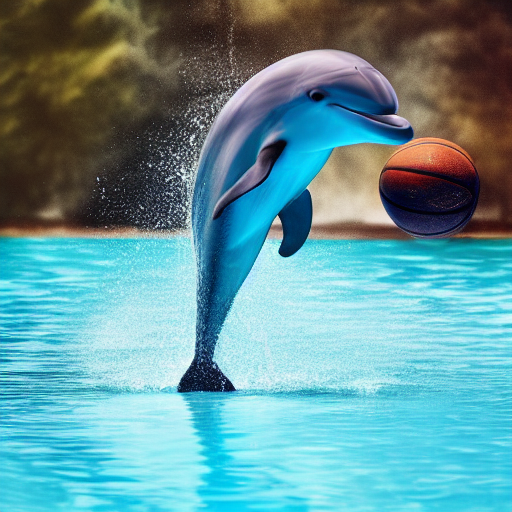

In [8]:
prompt = "dolphin dunking a basketball on a net"
uncond_prompt = "" # You can use it as a negative prompt

do_cfg = True
cfg_scale = 7
sampler = "ddpm"
strength = 0.9

num_inference_steps = 50
seed = 99

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    models=models,
    seed=seed,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

Image.fromarray(output_image)

# Image-to-Image Architecture

Conditional CLIP embedding stats: mean=-0.1052, std=1.0128
Unconditional CLIP embedding stats: mean=-0.1088, std=1.0394
CLIP encoding shape: torch.Size([2, 77, 768])
CLIP encoding stats: mean=-0.1070, std=1.0262
Strength set to 0.6. Starting at step 36 out of 90
Using 54 timesteps for inference
Initial latents shape: torch.Size([1, 4, 64, 64])
Initial latents mean: 0.0254, std: 0.9828


  2%|▏         | 1/54 [00:11<10:33, 11.94s/it]

CFG output stats: mean=-0.0008, std=1.0217
Step 0, timestep: 583
UNet input stats: mean=0.0254, std=0.9828
UNet output stats: mean=-0.0008, std=1.0217
Updated latents stats: mean=0.0278, std=0.9791


  4%|▎         | 2/54 [00:19<07:55,  9.15s/it]

CFG output stats: mean=0.0025, std=1.0080
Step 1, timestep: 572
UNet input stats: mean=0.0278, std=0.9791
UNet output stats: mean=0.0025, std=1.0080
Updated latents stats: mean=0.0266, std=0.9800


  6%|▌         | 3/54 [00:26<06:57,  8.19s/it]

CFG output stats: mean=0.0028, std=1.0027
Step 2, timestep: 561
UNet input stats: mean=0.0266, std=0.9800
UNet output stats: mean=0.0028, std=1.0027
Updated latents stats: mean=0.0253, std=0.9790


  7%|▋         | 4/54 [00:33<06:28,  7.76s/it]

CFG output stats: mean=0.0024, std=0.9955
Step 3, timestep: 550
UNet input stats: mean=0.0253, std=0.9790
UNet output stats: mean=0.0024, std=0.9955
Updated latents stats: mean=0.0276, std=0.9793


  9%|▉         | 5/54 [00:40<06:07,  7.50s/it]

CFG output stats: mean=0.0030, std=1.0054
Step 4, timestep: 539
UNet input stats: mean=0.0276, std=0.9793
UNet output stats: mean=0.0030, std=1.0054
Updated latents stats: mean=0.0273, std=0.9802


 11%|█         | 6/54 [00:47<05:47,  7.23s/it]

CFG output stats: mean=0.0029, std=1.0001
Step 5, timestep: 528
UNet input stats: mean=0.0273, std=0.9802
UNet output stats: mean=0.0029, std=1.0001
Updated latents stats: mean=0.0287, std=0.9780


 13%|█▎        | 7/54 [00:53<05:34,  7.11s/it]

CFG output stats: mean=0.0024, std=0.9958
Step 6, timestep: 517
UNet input stats: mean=0.0287, std=0.9780
UNet output stats: mean=0.0024, std=0.9958
Updated latents stats: mean=0.0267, std=0.9789


 15%|█▍        | 8/54 [01:01<05:28,  7.15s/it]

CFG output stats: mean=0.0020, std=0.9900
Step 7, timestep: 506
UNet input stats: mean=0.0267, std=0.9789
UNet output stats: mean=0.0020, std=0.9900
Updated latents stats: mean=0.0277, std=0.9768


 17%|█▋        | 9/54 [01:07<05:17,  7.05s/it]

CFG output stats: mean=0.0018, std=0.9902
Step 8, timestep: 495
UNet input stats: mean=0.0277, std=0.9768
UNet output stats: mean=0.0018, std=0.9902
Updated latents stats: mean=0.0282, std=0.9743


 19%|█▊        | 10/54 [01:15<05:11,  7.07s/it]

CFG output stats: mean=0.0016, std=0.9898
Step 9, timestep: 484
UNet input stats: mean=0.0282, std=0.9743
UNet output stats: mean=0.0016, std=0.9898
Updated latents stats: mean=0.0297, std=0.9736


 20%|██        | 11/54 [01:22<05:04,  7.09s/it]

CFG output stats: mean=0.0017, std=0.9916
Step 10, timestep: 473
UNet input stats: mean=0.0297, std=0.9736
UNet output stats: mean=0.0017, std=0.9916
Updated latents stats: mean=0.0285, std=0.9696


 22%|██▏       | 12/54 [01:29<05:00,  7.15s/it]

CFG output stats: mean=0.0007, std=0.9921
Step 11, timestep: 462
UNet input stats: mean=0.0285, std=0.9696
UNet output stats: mean=0.0007, std=0.9921
Updated latents stats: mean=0.0316, std=0.9689


 24%|██▍       | 13/54 [01:36<04:50,  7.09s/it]

CFG output stats: mean=0.0004, std=0.9959
Step 12, timestep: 451
UNet input stats: mean=0.0316, std=0.9689
UNet output stats: mean=0.0004, std=0.9959
Updated latents stats: mean=0.0315, std=0.9685


 26%|██▌       | 14/54 [01:43<04:40,  7.01s/it]

CFG output stats: mean=0.0002, std=0.9977
Step 13, timestep: 440
UNet input stats: mean=0.0315, std=0.9685
UNet output stats: mean=0.0002, std=0.9977
Updated latents stats: mean=0.0312, std=0.9682


 28%|██▊       | 15/54 [01:50<04:30,  6.94s/it]

CFG output stats: mean=-0.0001, std=0.9877
Step 14, timestep: 429
UNet input stats: mean=0.0312, std=0.9682
UNet output stats: mean=-0.0001, std=0.9877
Updated latents stats: mean=0.0305, std=0.9679


 30%|██▉       | 16/54 [01:57<04:24,  6.97s/it]

CFG output stats: mean=-0.0005, std=0.9832
Step 15, timestep: 418
UNet input stats: mean=0.0305, std=0.9679
UNet output stats: mean=-0.0005, std=0.9832
Updated latents stats: mean=0.0291, std=0.9685


 31%|███▏      | 17/54 [02:04<04:23,  7.11s/it]

CFG output stats: mean=-0.0005, std=0.9742
Step 16, timestep: 407
UNet input stats: mean=0.0291, std=0.9685
UNet output stats: mean=-0.0005, std=0.9742
Updated latents stats: mean=0.0312, std=0.9685


 33%|███▎      | 18/54 [02:11<04:15,  7.10s/it]

CFG output stats: mean=-0.0007, std=0.9712
Step 17, timestep: 396
UNet input stats: mean=0.0312, std=0.9685
UNet output stats: mean=-0.0007, std=0.9712
Updated latents stats: mean=0.0326, std=0.9662


 35%|███▌      | 19/54 [02:18<04:09,  7.14s/it]

CFG output stats: mean=-0.0006, std=0.9657
Step 18, timestep: 385
UNet input stats: mean=0.0326, std=0.9661
UNet output stats: mean=-0.0006, std=0.9657
Updated latents stats: mean=0.0344, std=0.9649


 37%|███▋      | 20/54 [02:26<04:07,  7.28s/it]

CFG output stats: mean=-0.0004, std=0.9612
Step 19, timestep: 374
UNet input stats: mean=0.0344, std=0.9649
UNet output stats: mean=-0.0004, std=0.9612
Updated latents stats: mean=0.0373, std=0.9630


 39%|███▉      | 21/54 [02:33<04:02,  7.35s/it]

CFG output stats: mean=-0.0002, std=0.9562
Step 20, timestep: 363
UNet input stats: mean=0.0373, std=0.9630
UNet output stats: mean=-0.0002, std=0.9562
Updated latents stats: mean=0.0378, std=0.9644


 41%|████      | 22/54 [02:41<03:53,  7.30s/it]

CFG output stats: mean=-0.0003, std=0.9526
Step 21, timestep: 352
UNet input stats: mean=0.0378, std=0.9644
UNet output stats: mean=-0.0003, std=0.9526
Updated latents stats: mean=0.0405, std=0.9628


 43%|████▎     | 23/54 [02:48<03:44,  7.25s/it]

CFG output stats: mean=-0.0004, std=0.9498
Step 22, timestep: 341
UNet input stats: mean=0.0405, std=0.9628
UNet output stats: mean=-0.0004, std=0.9498
Updated latents stats: mean=0.0418, std=0.9587


 44%|████▍     | 24/54 [02:55<03:36,  7.22s/it]

CFG output stats: mean=-0.0003, std=0.9440
Step 23, timestep: 330
UNet input stats: mean=0.0418, std=0.9586
UNet output stats: mean=-0.0003, std=0.9440
Updated latents stats: mean=0.0419, std=0.9582


 46%|████▋     | 25/54 [03:02<03:31,  7.28s/it]

CFG output stats: mean=-0.0005, std=0.9411
Step 24, timestep: 319
UNet input stats: mean=0.0419, std=0.9582
UNet output stats: mean=-0.0005, std=0.9411
Updated latents stats: mean=0.0411, std=0.9578


 48%|████▊     | 26/54 [03:10<03:25,  7.33s/it]

CFG output stats: mean=-0.0006, std=0.9348
Step 25, timestep: 308
UNet input stats: mean=0.0411, std=0.9578
UNet output stats: mean=-0.0006, std=0.9348
Updated latents stats: mean=0.0417, std=0.9603


 50%|█████     | 27/54 [03:17<03:17,  7.30s/it]

CFG output stats: mean=-0.0007, std=0.9300
Step 26, timestep: 297
UNet input stats: mean=0.0417, std=0.9603
UNet output stats: mean=-0.0007, std=0.9300
Updated latents stats: mean=0.0416, std=0.9596


 52%|█████▏    | 28/54 [03:25<03:11,  7.37s/it]

CFG output stats: mean=-0.0007, std=0.9243
Step 27, timestep: 286
UNet input stats: mean=0.0416, std=0.9596
UNet output stats: mean=-0.0007, std=0.9243
Updated latents stats: mean=0.0438, std=0.9605


 54%|█████▎    | 29/54 [03:32<03:05,  7.42s/it]

CFG output stats: mean=-0.0006, std=0.9218
Step 28, timestep: 275
UNet input stats: mean=0.0438, std=0.9605
UNet output stats: mean=-0.0006, std=0.9218
Updated latents stats: mean=0.0439, std=0.9586


 56%|█████▌    | 30/54 [03:39<02:53,  7.24s/it]

CFG output stats: mean=-0.0006, std=0.9178
Step 29, timestep: 264
UNet input stats: mean=0.0439, std=0.9586
UNet output stats: mean=-0.0006, std=0.9178
Updated latents stats: mean=0.0446, std=0.9588


 57%|█████▋    | 31/54 [03:46<02:46,  7.24s/it]

CFG output stats: mean=-0.0008, std=0.9143
Step 30, timestep: 253
UNet input stats: mean=0.0446, std=0.9588
UNet output stats: mean=-0.0008, std=0.9143
Updated latents stats: mean=0.0448, std=0.9584


 59%|█████▉    | 32/54 [03:54<02:40,  7.29s/it]

CFG output stats: mean=-0.0008, std=0.9098
Step 31, timestep: 242
UNet input stats: mean=0.0448, std=0.9584
UNet output stats: mean=-0.0008, std=0.9098
Updated latents stats: mean=0.0441, std=0.9579


 61%|██████    | 33/54 [04:01<02:33,  7.33s/it]

CFG output stats: mean=-0.0006, std=0.9067
Step 32, timestep: 231
UNet input stats: mean=0.0441, std=0.9579
UNet output stats: mean=-0.0006, std=0.9067
Updated latents stats: mean=0.0466, std=0.9570


 63%|██████▎   | 34/54 [04:08<02:25,  7.25s/it]

CFG output stats: mean=-0.0005, std=0.9016
Step 33, timestep: 220
UNet input stats: mean=0.0466, std=0.9570
UNet output stats: mean=-0.0005, std=0.9016
Updated latents stats: mean=0.0490, std=0.9550


 65%|██████▍   | 35/54 [04:15<02:17,  7.26s/it]

CFG output stats: mean=-0.0003, std=0.8956
Step 34, timestep: 209
UNet input stats: mean=0.0490, std=0.9550
UNet output stats: mean=-0.0003, std=0.8956
Updated latents stats: mean=0.0496, std=0.9534


 67%|██████▋   | 36/54 [04:23<02:11,  7.32s/it]

CFG output stats: mean=-0.0005, std=0.8889
Step 35, timestep: 198
UNet input stats: mean=0.0496, std=0.9534
UNet output stats: mean=-0.0005, std=0.8889
Updated latents stats: mean=0.0509, std=0.9499


 69%|██████▊   | 37/54 [04:31<02:07,  7.52s/it]

CFG output stats: mean=-0.0005, std=0.8830
Step 36, timestep: 187
UNet input stats: mean=0.0509, std=0.9499
UNet output stats: mean=-0.0005, std=0.8830
Updated latents stats: mean=0.0499, std=0.9469


 70%|███████   | 38/54 [04:38<01:59,  7.47s/it]

CFG output stats: mean=-0.0005, std=0.8755
Step 37, timestep: 176
UNet input stats: mean=0.0499, std=0.9469
UNet output stats: mean=-0.0005, std=0.8755
Updated latents stats: mean=0.0498, std=0.9451


 72%|███████▏  | 39/54 [04:45<01:50,  7.35s/it]

CFG output stats: mean=-0.0004, std=0.8691
Step 38, timestep: 165
UNet input stats: mean=0.0498, std=0.9451
UNet output stats: mean=-0.0004, std=0.8691
Updated latents stats: mean=0.0499, std=0.9452


 74%|███████▍  | 40/54 [04:52<01:42,  7.33s/it]

CFG output stats: mean=-0.0004, std=0.8637
Step 39, timestep: 154
UNet input stats: mean=0.0499, std=0.9452
UNet output stats: mean=-0.0004, std=0.8637
Updated latents stats: mean=0.0504, std=0.9444


 76%|███████▌  | 41/54 [05:00<01:36,  7.45s/it]

CFG output stats: mean=-0.0005, std=0.8568
Step 40, timestep: 143
UNet input stats: mean=0.0504, std=0.9444
UNet output stats: mean=-0.0005, std=0.8568
Updated latents stats: mean=0.0520, std=0.9442


 78%|███████▊  | 42/54 [05:08<01:29,  7.44s/it]

CFG output stats: mean=-0.0007, std=0.8483
Step 41, timestep: 132
UNet input stats: mean=0.0520, std=0.9442
UNet output stats: mean=-0.0007, std=0.8483
Updated latents stats: mean=0.0540, std=0.9429


 80%|███████▉  | 43/54 [05:15<01:21,  7.40s/it]

CFG output stats: mean=-0.0007, std=0.8367
Step 42, timestep: 121
UNet input stats: mean=0.0540, std=0.9428
UNet output stats: mean=-0.0007, std=0.8367
Updated latents stats: mean=0.0551, std=0.9412


 81%|████████▏ | 44/54 [05:22<01:13,  7.31s/it]

CFG output stats: mean=-0.0008, std=0.8254
Step 43, timestep: 110
UNet input stats: mean=0.0551, std=0.9412
UNet output stats: mean=-0.0008, std=0.8254
Updated latents stats: mean=0.0565, std=0.9388


 83%|████████▎ | 45/54 [05:29<01:06,  7.36s/it]

CFG output stats: mean=-0.0008, std=0.8135
Step 44, timestep: 99
UNet input stats: mean=0.0565, std=0.9388
UNet output stats: mean=-0.0008, std=0.8135
Updated latents stats: mean=0.0580, std=0.9372


 85%|████████▌ | 46/54 [05:37<00:59,  7.42s/it]

CFG output stats: mean=-0.0008, std=0.8050
Step 45, timestep: 88
UNet input stats: mean=0.0580, std=0.9371
UNet output stats: mean=-0.0008, std=0.8050
Updated latents stats: mean=0.0585, std=0.9365


 87%|████████▋ | 47/54 [05:44<00:51,  7.39s/it]

CFG output stats: mean=-0.0007, std=0.7908
Step 46, timestep: 77
UNet input stats: mean=0.0585, std=0.9365
UNet output stats: mean=-0.0007, std=0.7908
Updated latents stats: mean=0.0599, std=0.9348


 89%|████████▉ | 48/54 [05:51<00:43,  7.29s/it]

CFG output stats: mean=-0.0007, std=0.7748
Step 47, timestep: 66
UNet input stats: mean=0.0599, std=0.9348
UNet output stats: mean=-0.0007, std=0.7748
Updated latents stats: mean=0.0618, std=0.9329


 91%|█████████ | 49/54 [05:59<00:36,  7.32s/it]

CFG output stats: mean=-0.0007, std=0.7581
Step 48, timestep: 55
UNet input stats: mean=0.0618, std=0.9329
UNet output stats: mean=-0.0007, std=0.7581
Updated latents stats: mean=0.0634, std=0.9304


 93%|█████████▎| 50/54 [06:06<00:29,  7.27s/it]

CFG output stats: mean=-0.0007, std=0.7360
Step 49, timestep: 44
UNet input stats: mean=0.0634, std=0.9304
UNet output stats: mean=-0.0007, std=0.7360
Updated latents stats: mean=0.0635, std=0.9269


 94%|█████████▍| 51/54 [06:13<00:21,  7.26s/it]

CFG output stats: mean=-0.0005, std=0.7078
Step 50, timestep: 33
UNet input stats: mean=0.0635, std=0.9269
UNet output stats: mean=-0.0005, std=0.7078
Updated latents stats: mean=0.0644, std=0.9250


 96%|█████████▋| 52/54 [06:21<00:14,  7.31s/it]

CFG output stats: mean=-0.0003, std=0.6674
Step 51, timestep: 22
UNet input stats: mean=0.0644, std=0.9249
UNet output stats: mean=-0.0003, std=0.6674
Updated latents stats: mean=0.0644, std=0.9220


 98%|█████████▊| 53/54 [06:28<00:07,  7.41s/it]

CFG output stats: mean=-0.0001, std=0.5965
Step 52, timestep: 11
UNet input stats: mean=0.0644, std=0.9220
UNet output stats: mean=-0.0001, std=0.5965
Updated latents stats: mean=0.0649, std=0.9177
CFG output stats: mean=0.0003, std=0.3012


100%|██████████| 54/54 [06:36<00:00,  7.34s/it]

Step 53, timestep: 0
UNet input stats: mean=0.0649, std=0.9177
UNet output stats: mean=0.0003, std=0.3012
Updated latents stats: mean=0.0649, std=0.9172


Final latents stats: mean=0.0649, std=0.9172
Decoded image stats: min=0.0000, max=255.0000, mean=91.1143


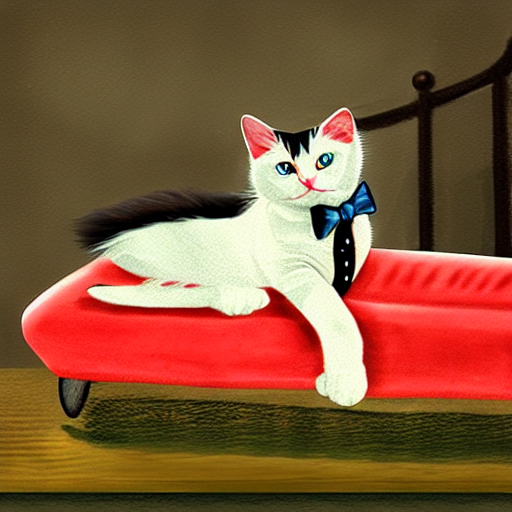

In [2]:
prompt = "Calico cat wearing a tuxedo, cartoon"
uncond_prompt = "" # You can use it as a negative prompt

do_cfg = True
cfg_scale = 10
sampler = "ddpm"
strength = 0.6
num_inference_steps = 90
seed = 42

image_path = "examples/cat.png"
input_image = Image.open(image_path)




output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    models=models,
    seed=seed,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

Image.fromarray(output_image)